In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log
import plotly.offline as py

In [2]:
import prophet
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [3]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/TSForecasting/TCS.NS-2.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/5/2019,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
1,3/6/2019,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2,3/7/2019,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884
3,3/8/2019,2025.000000,2033.000000,2010.050049,2022.699951,1810.288330,2031071
4,3/11/2019,2028.900024,2033.000000,2003.650024,2014.800049,1803.217896,3111689


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1235 non-null   datetime64[ns]
 1   Open       1235 non-null   float64       
 2   High       1235 non-null   float64       
 3   Low        1235 non-null   float64       
 4   Close      1235 non-null   float64       
 5   Adj Close  1235 non-null   float64       
 6   Volume     1235 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.7 KB


In [5]:
len(df)

1235

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df['Date'].nunique()

1235

In [8]:
df['Date'].min()

Timestamp('2019-03-05 00:00:00')

In [9]:
df['Date'].max()

Timestamp('2024-03-01 00:00:00')

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
total = df.groupby(['Date'])['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'].sum().reset_index()

In [14]:
total.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,2005.000000,2007.0,1976.599976,1988.099976,1779.321777,2449622
1,2019-03-06,1989.300049,2015.0,1985.050049,1999.599976,1789.614380,2635047


In [ ]:
# df is a pandas.DataFrame with 'y' and 'ds' columns
# Ensure to change your date to ds and target variable to y whenever you build prophet model 

In [15]:
df_prophet = total.rename(columns={'Date':'ds', 'Volume':'y'})

In [16]:
df_prophet.head(3)

,ds,Open,High,Low,Close,Adj Close,y
0,2019-03-05,2005.000000,2007.000000,1976.599976,1988.099976,1779.321777,2449622
1,2019-03-06,1989.300049,2015.000000,1985.050049,1999.599976,1789.614380,2635047
2,2019-03-07,2005.000000,2024.050049,2000.199951,2013.300049,1801.875488,2539884


In [17]:
from prophet import Prophet

m = Prophet()
model  = m.fit(df_prophet)

11:08:59 - cmdstanpy - INFO - Chain [1] start processing
11:08:59 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
# Build Time series model

future_global = model.make_future_dataframe(periods=100, freq='D')

In [20]:
future_global.tail(20)

,ds
1315,2024-05-21
1316,2024-05-22
1317,2024-05-23
1318,2024-05-24
1319,2024-05-25
1320,2024-05-26
1321,2024-05-27
1322,2024-05-28
1323,2024-05-29
1324,2024-05-30


In [21]:
len(future_global)

1335

In [22]:
# Prediction

prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-05,1.638711e+06,1.231492e+06,4.822174e+06,1.638711e+06,1.638711e+06,1.340622e+06,1.340622e+06,1.340622e+06,8.578663e+05,8.578663e+05,8.578663e+05,482755.247291,482755.247291,482755.247291,0.0,0.0,0.0,2.979332e+06
1,2019-03-06,1.642126e+06,1.190370e+06,4.633408e+06,1.642126e+06,1.642126e+06,1.174071e+06,1.174071e+06,1.174071e+06,6.634830e+05,6.634830e+05,6.634830e+05,510587.668992,510587.668992,510587.668992,0.0,0.0,0.0,2.816196e+06
2,2019-03-07,1.645541e+06,1.228313e+06,4.812057e+06,1.645541e+06,1.645541e+06,1.485903e+06,1.485903e+06,1.485903e+06,9.538928e+05,9.538928e+05,9.538928e+05,532010.366053,532010.366053,532010.366053,0.0,0.0,0.0,3.131444e+06
3,2019-03-08,1.648955e+06,1.240211e+06,4.997513e+06,1.648955e+06,1.648955e+06,1.645084e+06,1.645084e+06,1.645084e+06,1.097988e+06,1.097988e+06,1.097988e+06,547095.466632,547095.466632,547095.466632,0.0,0.0,0.0,3.294039e+06
4,2019-03-11,1.659200e+06,1.104344e+06,4.744945e+06,1.659200e+06,1.659200e+06,1.322391e+06,1.322391e+06,1.322391e+06,7.652410e+05,7.652410e+05,7.652410e+05,557150.462374,557150.462374,557150.462374,0.0,0.0,0.0,2.981592e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2024-06-05,1.184856e+06,3.761729e+04,3.531229e+06,1.142142e+06,1.224762e+06,5.771362e+05,5.771362e+05,5.771362e+05,6.634830e+05,6.634830e+05,6.634830e+05,-86346.849695,-86346.849695,-86346.849695,0.0,0.0,0.0,1.761992e+06
1331,2024-06-06,1.185073e+06,2.129787e+05,3.913674e+06,1.141661e+06,1.226131e+06,8.281796e+05,8.281796e+05,8.281796e+05,9.538928e+05,9.538928e+05,9.538928e+05,-125713.214290,-125713.214290,-125713.214290,0.0,0.0,0.0,2.013253e+06
1332,2024-06-07,1.185290e+06,4.332907e+05,3.940268e+06,1.141341e+06,1.227265e+06,9.291669e+05,9.291669e+05,9.291669e+05,1.097988e+06,1.097988e+06,1.097988e+06,-168821.231831,-168821.231831,-168821.231831,0.0,0.0,0.0,2.114457e+06
1333,2024-06-08,1.185508e+06,-3.006454e+06,7.407630e+05,1.141020e+06,1.228241e+06,-2.295476e+06,-2.295476e+06,-2.295476e+06,-2.080833e+06,-2.080833e+06,-2.080833e+06,-214642.878561,-214642.878561,-214642.878561,0.0,0.0,0.0,-1.109969e+06


In [23]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [24]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
1330,2024-06-05,3.761729e+04,3.531229e+06,1.761992e+06
1331,2024-06-06,2.129787e+05,3.913674e+06,2.013253e+06
1332,2024-06-07,4.332907e+05,3.940268e+06,2.114457e+06
1333,2024-06-08,-3.006454e+06,7.407630e+05,-1.109969e+06
1334,2024-06-09,-3.229631e+06,3.865718e+05,-1.334015e+06


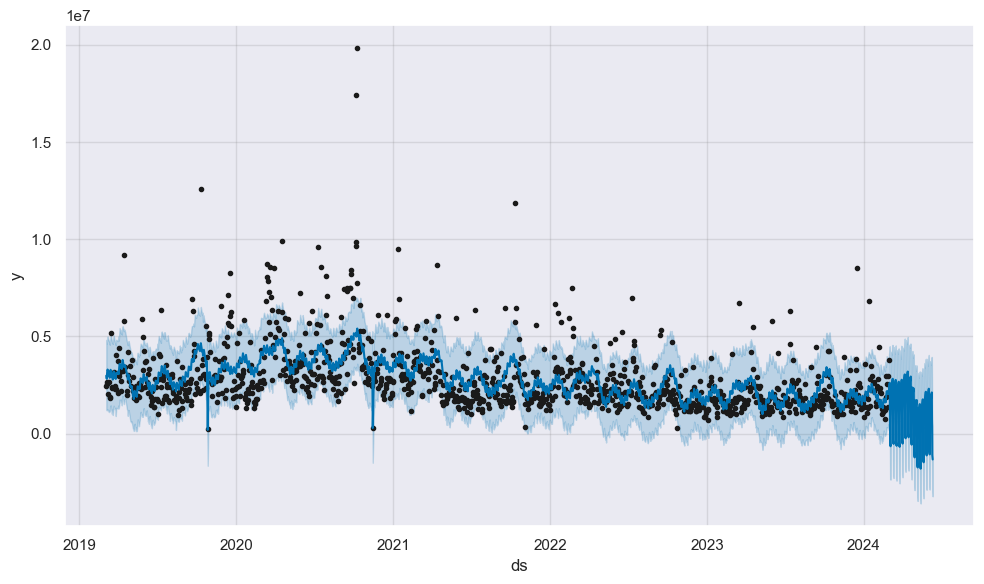

In [26]:
model.plot(prediction)
plt.show()

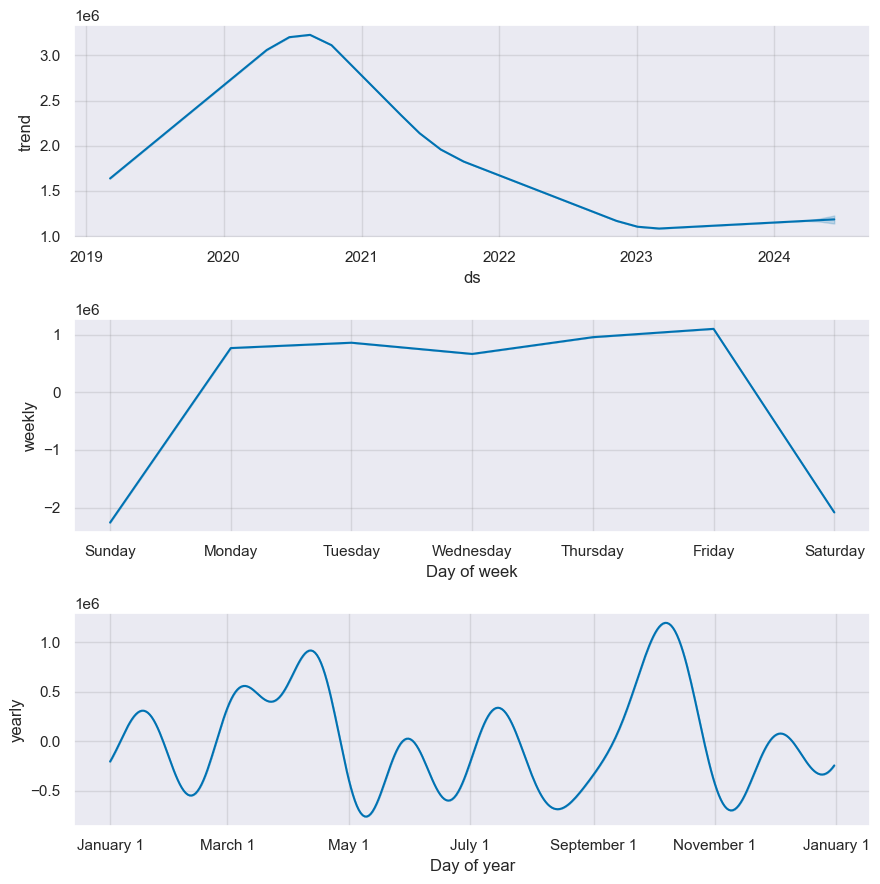

In [29]:
model.plot_components(prediction)
plt.show()

In [30]:
# Find the accuracy along with corss validation method

from prophet.diagnostics import cross_validation

df_cv = cross_validation(model=model, horizon='30 days', period='15 days', initial='90 days')
#horizon = 30 days forecasting
#period = Do cross validatio every 15 days
#initial = Initial training set, Closing wondow

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/114 [00:00<?, ?it/s]

11:29:57 - cmdstanpy - INFO - Chain [1] start processing
11:29:57 - cmdstanpy - INFO - Chain [1] done processing
11:29:57 - cmdstanpy - INFO - Chain [1] start processing
11:29:57 - cmdstanpy - INFO - Chain [1] done processing
11:29:57 - cmdstanpy - INFO - Chain [1] start processing
11:29:57 - cmdstanpy - INFO - Chain [1] done processing
11:29:57 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing
11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing
11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing
11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing
11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing
11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1]

In [31]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-12,2.652843e+06,1.348354e+06,3.881543e+06,2404448,2019-06-11
1,2019-06-13,3.718047e+06,2.413238e+06,4.938783e+06,3320916,2019-06-11
2,2019-06-14,4.493541e+06,3.199983e+06,5.818127e+06,2131408,2019-06-11
3,2019-06-17,9.616687e+06,8.208135e+06,1.086934e+07,1489497,2019-06-11
4,2019-06-18,1.245652e+07,1.116846e+07,1.374579e+07,1877447,2019-06-11
...,...,...,...,...,...,...
2315,2024-02-26,1.969234e+06,1.356557e+05,3.894130e+06,1379284,2024-01-31
2316,2024-02-27,2.108706e+06,3.191004e+05,3.830085e+06,2960475,2024-01-31
2317,2024-02-28,1.983881e+06,2.701584e+05,3.745141e+06,1939225,2024-01-31
2318,2024-02-29,2.323548e+06,5.598548e+05,3.965826e+06,3772719,2024-01-31


In [32]:
#Check performance

from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)

In [33]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.204106e+12,1.790002e+06,1.136491e+06,0.494078,0.324729,0.379903,0.825627
1,4 days,3.307892e+12,1.818761e+06,1.124952e+06,0.440214,0.313722,0.368490,0.827586
2,5 days,3.877379e+12,1.969106e+06,1.280467e+06,0.492062,0.358324,0.414232,0.778972
3,6 days,4.549891e+12,2.133047e+06,1.362893e+06,0.494670,0.370078,0.432274,0.755129
4,7 days,5.719517e+12,2.391551e+06,1.524792e+06,0.610072,0.415826,0.480348,0.725369
5,8 days,6.322336e+12,2.514426e+06,1.551548e+06,0.698377,0.414208,0.476632,0.725985
6,9 days,8.723760e+12,2.953601e+06,1.631539e+06,0.696219,0.390091,0.470885,0.729594
7,10 days,9.838996e+12,3.136717e+06,1.615129e+06,0.617617,0.345673,0.437850,0.760639
8,11 days,9.127064e+12,3.021103e+06,1.612635e+06,0.562786,0.388513,0.454573,0.769504
9,12 days,1.145089e+13,3.383917e+06,1.640571e+06,0.628424,0.386466,0.462347,0.777909


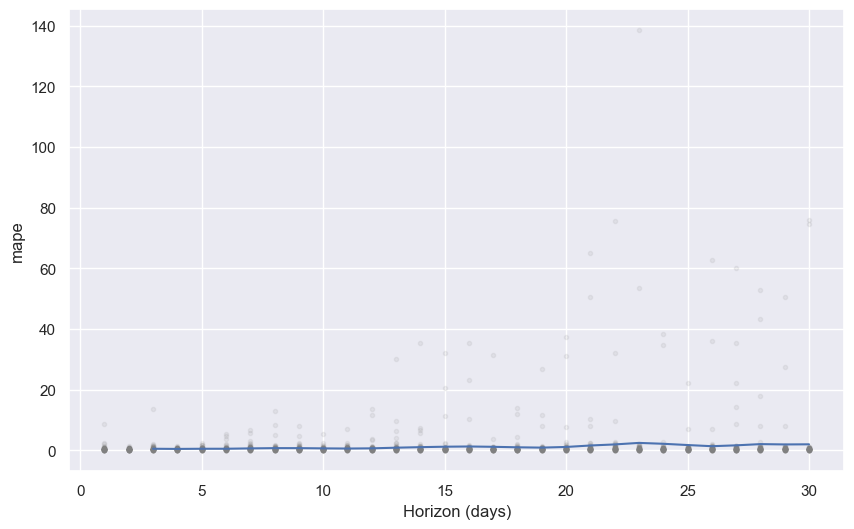

In [35]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

# Darts model

In [36]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset


In [37]:
AirPassengersDataset().load()

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [38]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

In [40]:
MonthlyMilkDataset().load().pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Pounds per cow, Length: 168, dtype: float64

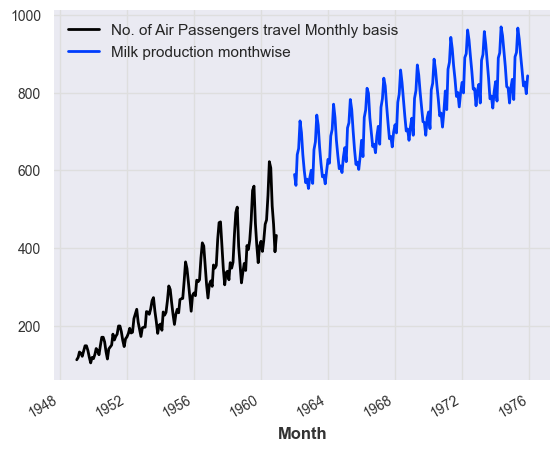

In [41]:
airline_dataset = AirPassengersDataset().load()
milk_dataset = MonthlyMilkDataset().load()

airline_dataset.plot(label='No. of Air Passengers travel Monthly basis')
milk_dataset.plot(label='Milk production monthwise')

plt.legend()
plt.show()

In [52]:
# Mandatory step - Feature scaling

from darts.dataprocessing.transformers import Scaler
airline_scale = Scaler()
milk_scale= Scaler()

airline_scale_df = airline_scale.fit_transform(airline_dataset)
milk_scale_df = milk_scale.fit_transform(milk_dataset)


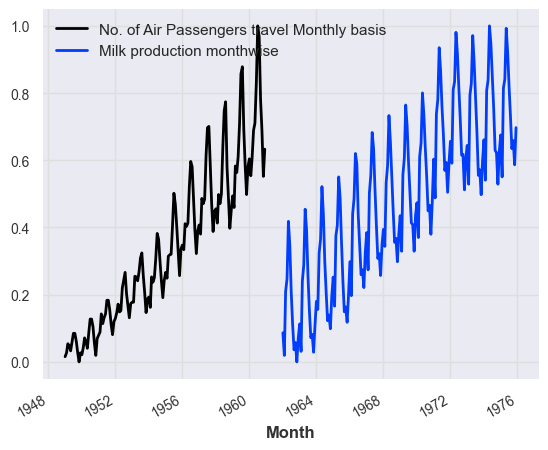

In [53]:
airline_scale_df.plot(label='No. of Air Passengers travel Monthly basis')
milk_scale_df.plot(label='Milk production monthwise')

plt.legend()
plt.show()

In [62]:
#split the data into train and test

train_air, val_air = airline_scale_df[: -36], airline_scale_df[-36:]
train_milk, val_milk = milk_dataset[: -36], milk_dataset[-36:]

In [63]:
len(train_milk)

132

In [64]:
len(val_milk)

36

In [61]:
#Building time series model by using deep learning method - Darts

from darts import timeseries
from darts.models import TCNModel, TransformerModel, NBEATSModel, RNNModel, RandomForest

from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.metrics import mape

In [1]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length= 12, n_epochs=100, random_state=2024)
model_air_milk.fit([train_air, train_milk], verbose=True)

#input_chunk_length=24 (24 months input)
#output_chunk_length= 12 (Predict next 12 months using past 24 months data)

NameError: name 'NBEATSModel' is not defined